In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import gensim.models.keyedvectors as word2vec
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from scipy import signal

D:\Coding\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## prerequisites
### loading word2vec model

In [2]:
model = word2vec.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

### loading nsynth mp3 embedding

In [3]:
z = np.load('sample_z.npy')

### loading customized module

In [57]:
import my_klein
import importlib
importlib.reload(my_klein)

<module 'my_klein' from 'D:\\School\\artml\\project_3\\my_klein.py'>

### creating embeddings with reduced dimensionality

#### lyrics and manual tagging

In [5]:
# please define your own lyrics!
lyrics = ['We', 'don\'t', 'need', 'no', 'education']

# please define your own tagging!
# tagging of each word in seconds
# '' refers to background music without lyrics playing
durations = [('', 2.8),
             ('We', 0.4),
             ('don\'t', 0.4),
             ('need', 0.6),
             ('no', 1),
             ('education', 2),
             ('', 4.3)]

# calculate number of frames in the animation
fps = 100  # how smooth the video is
nframes = int(my_klein.get_frames(durations, fps))

#### set up PCA

In [6]:
pca = PCA(n_components=2)

#### use PCA for dimensionality reduction
word embedding

In [7]:
word_embeddings_orig = pca.fit_transform(model[lyrics])
word_embeddings = {}

for i, word in enumerate(lyrics):
    if word != '':
        word_embeddings[word] = word_embeddings_orig[i]

audio embedding

In [34]:
wav_embeddings_orig = pca.fit_transform(z[0])
print(wav_embeddings_orig.shape)
# use linear rescaling instead of other fancy stuff
word_embeddings_orig[:, 0] = (word_embeddings_orig[:, 0] - word_embeddings_orig[:, 0].min())/(word_embeddings_orig[:, 0].max() - word_embeddings_orig[:, 0].min())
word_embeddings_orig[:, 1] = (word_embeddings_orig[:, 1] - word_embeddings_orig[:, 1].min())/(word_embeddings_orig[:, 1].max() - word_embeddings_orig[:, 1].min())
wav_embeddings_orig[:, 0] = (wav_embeddings_orig[:, 0] - wav_embeddings_orig[:, 0].min())/(wav_embeddings_orig[:, 0].max() - wav_embeddings_orig[:, 0].min())
wav_embeddings_orig[:, 1] = (wav_embeddings_orig[:, 1] - wav_embeddings_orig[:, 1].min())/(wav_embeddings_orig[:, 1].max() - wav_embeddings_orig[:, 1].min())

for i, word in enumerate(lyrics):
    if word != '':
        word_embeddings[word] = word_embeddings_orig[i]

wav_embeddings = signal.resample(wav_embeddings_orig, nframes)

(359, 2)


D:\Coding\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
D:\Coding\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]


## creating animation

In [35]:
limit = 5  # how wide does the function span
resolution = 10  # how smooth the function surface is

# setting up space to hold the animated surface
x = np.linspace(-limit, limit, resolution)
X, Y = np.meshgrid(x, x)

# update rule for animation


### create frames in the animation

In [58]:
Zs = my_klein.get_XYZs(word_embeddings, durations, wav_embeddings, resolution, nframes, limit, fps)

In [59]:
print(Zs.shape)
def update_plot(i, Z, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(Zs[:, :,:,i][0], Zs[:, :,:,i][1], Zs[:, :,:,i][2], cmap="magma")
    ax.axis('off')

(3, 40, 40, 1150)


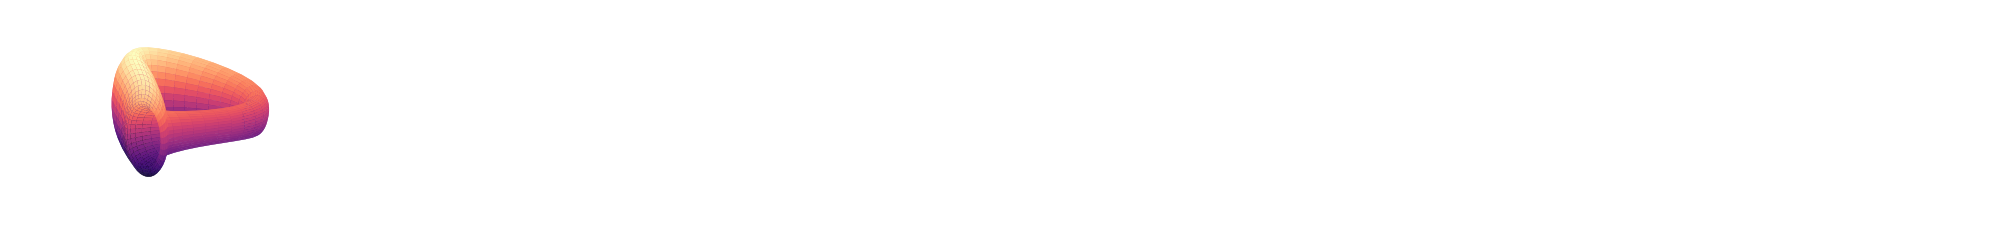

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot = [ax.plot_surface(Zs[:, :,:,i][0], Zs[:, :,:,i][1], Zs[:, :,:,i][2], color='0.75', rstride=1, cstride=1)]
ani = animation.FuncAnimation(fig, update_plot, frames=nframes, fargs=(Zs, plot), interval=1000/fps)

### visualize the animation

In [61]:
plt.rcParams['animation.html'] = 'html5'
ani

### save the animation to mp4 file

In [ ]:
ani.save('video.mp4',writer='ffmpeg',fps=fps)